In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns=df.columns.str.replace(' ','')

In [5]:
df

,CustomerID,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

In [7]:
df['SpendingScore(1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: SpendingScore(1-100), Length: 84, dtype: int64

In [8]:
data=df[['Age','SpendingScore(1-100)']]
data.head()

,Age,SpendingScore(1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


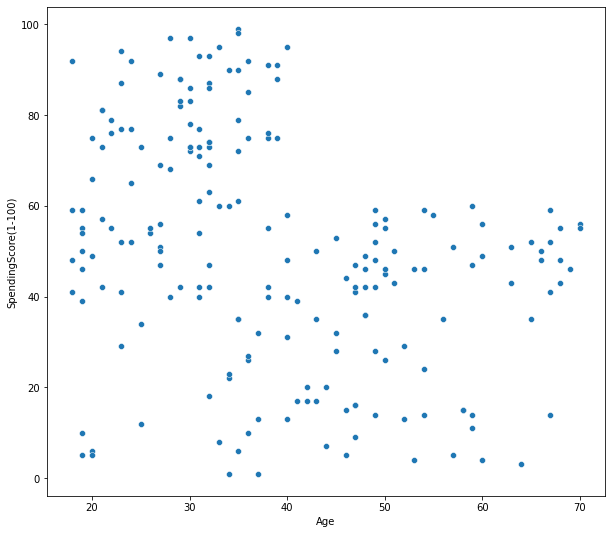

In [9]:
plt.figure(figsize=(10,9))
sb.scatterplot(data['Age'],data['SpendingScore(1-100)'])

#ELBOW METHOD

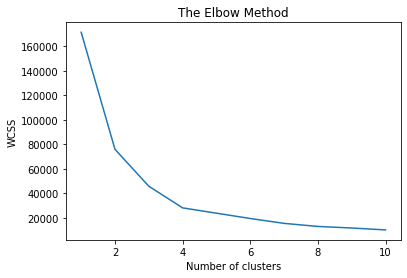

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmean.fit(data)
  wcss.append(kmean.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
wcss

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451,
 10173.039478114479]

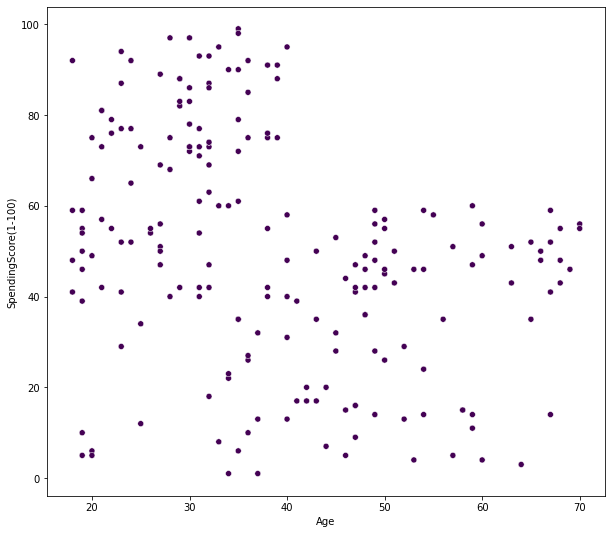

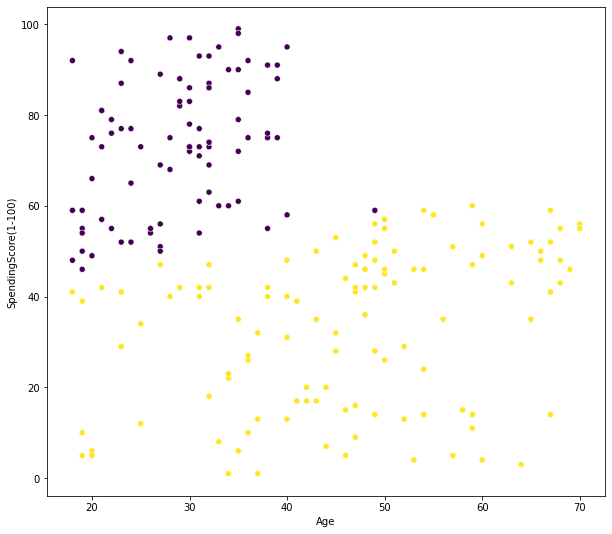

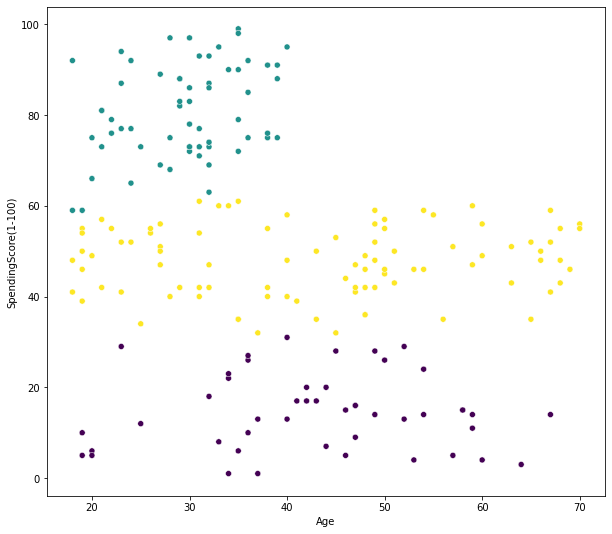

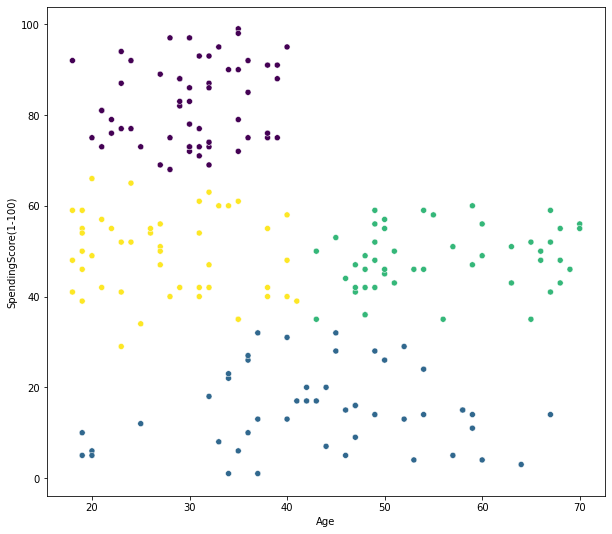

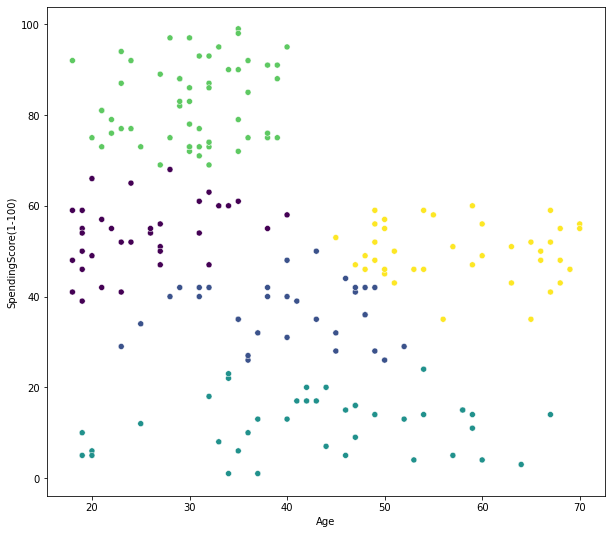

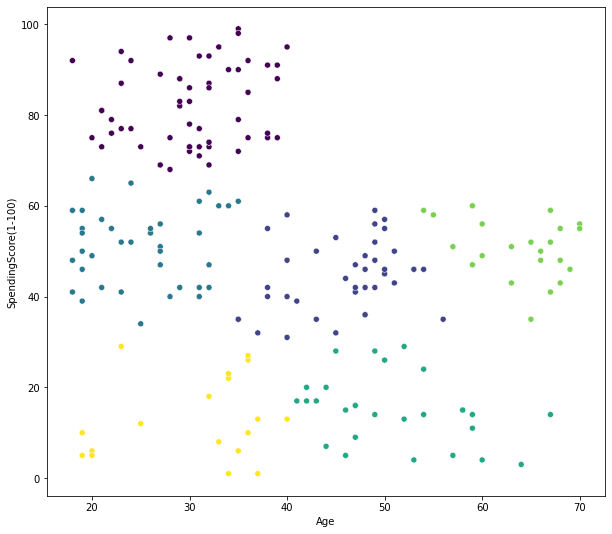

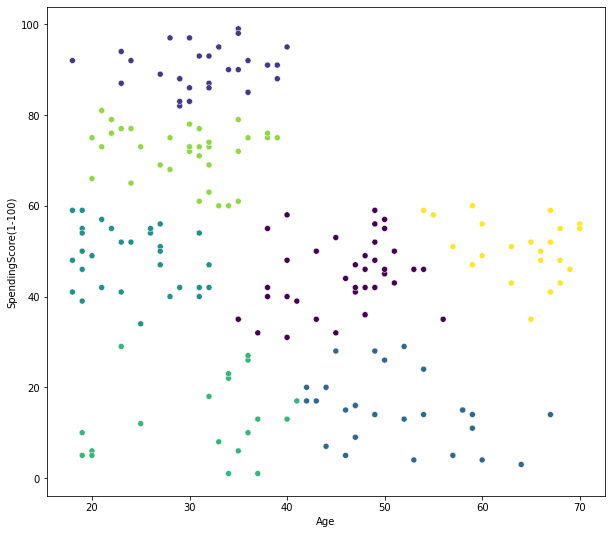

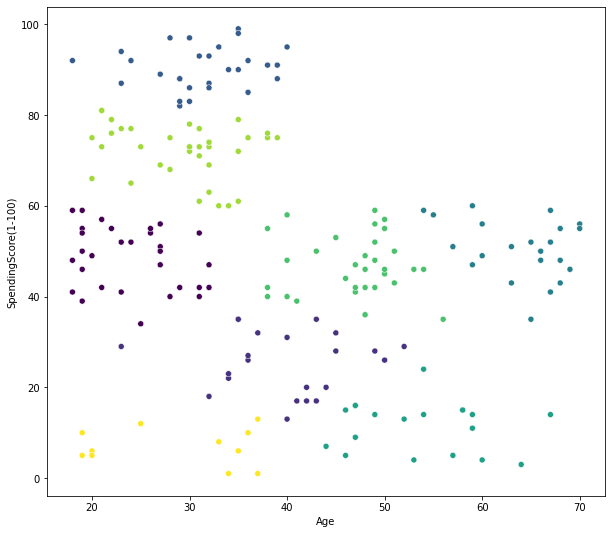

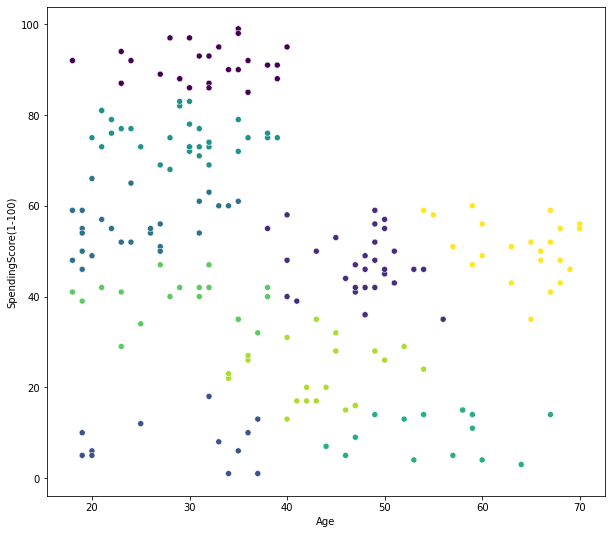

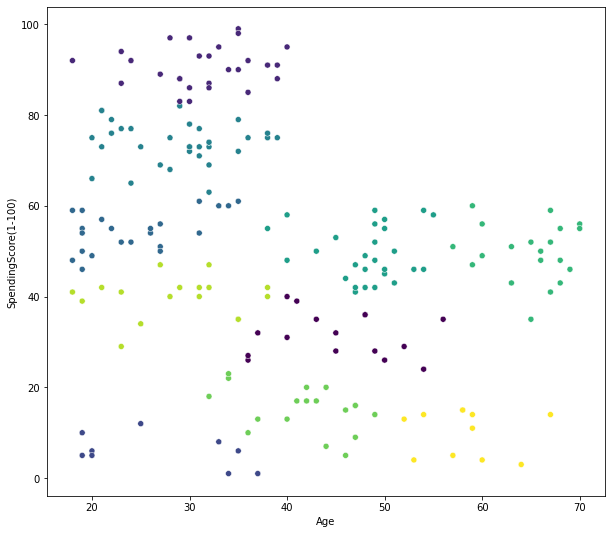

In [12]:
for i in range(1,11):
  kmean=KMeans(n_clusters=i)
  kmean.fit(data)
  y_pred=kmean.predict(data)
  plt.figure(figsize=(10,9))
  sb.scatterplot(data['Age'],data['SpendingScore(1-100)'],c=y_pred)

In [13]:
kmean=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_pred=kmean.fit_predict(data)
y_pred

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [14]:
centroids=kmean.cluster_centers_
centroids

array([[58.44444444, 50.52777778],
       [41.48484848, 37.        ],
       [30.1754386 , 82.35087719],
       [25.4       , 52.68571429],
       [43.28205128, 11.84615385]])

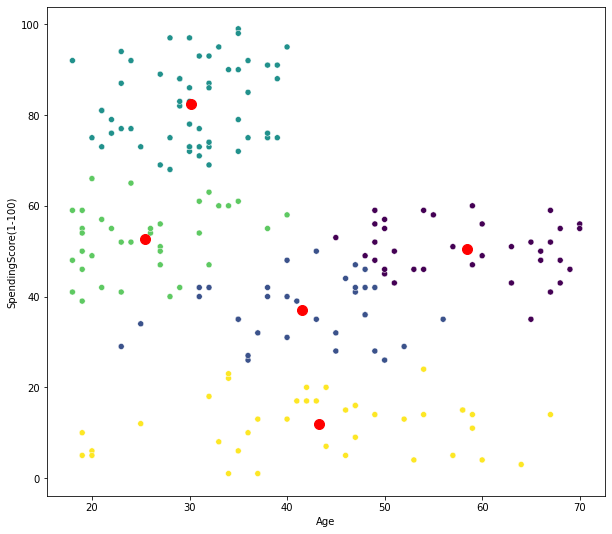

In [15]:
plt.figure(figsize=(10,9))
sb.scatterplot(data['Age'],data['SpendingScore(1-100)'],c=y_pred)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100)